In [1]:
%matplotlib inline
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from e11.fit import Gauss2D, Gauss2DAngle
from e11.plot import subplots_xy, imshow_xy, contour_xy

## 2D Gaussian

In [2]:
def gauss(x, y, x0, y0, amp, sigma, offset):
    """ """
    return amp * np.exp(-0.5 *
                        (((x - x0) / sigma)**2.0 + 
                         ((y - y0) / sigma)**2.0)) + offset

# generate data
nx, ny = (128, 96)
xvals = np.arange(nx)
yvals = np.arange(ny)
X, Y = np.meshgrid(xvals, yvals, indexing="ij")
p0 = [51, 47, 16, 6, 2]
Z = gauss(X, Y, *p0) + 0.5 * np.random.randn(*X.shape)

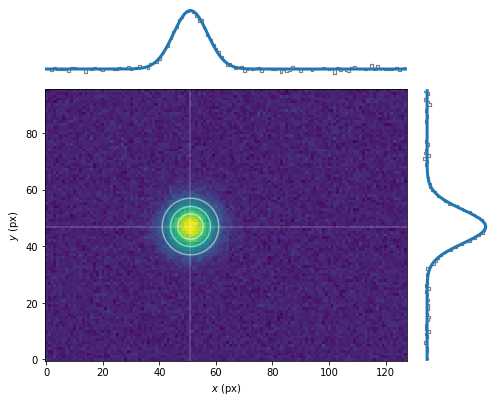

In [3]:
# fit
g = Gauss2D(X, Y, Z)
popt = g.fit()
best_fit = g.func(X, Y, *popt)

# xy slice plots
fig, axes = subplots_xy(figsize=(7, 7), size=1)

# data
imshow_xy(axes, popt[0], popt[1], Z.T,
          cmap="viridis",
          origin="lower",
          line_kw={"color":"white", "alpha":0.2},
          step_kw={"color":"black", "alpha":0.5, "linewidth":1.2})

# best fit
contour_xy(axes, popt[0], popt[1], X, Y, best_fit,
           autoscale=False, 
           levels=popt[2] * np.array([0.25, 0.5, 0.75]) + popt[-1],
           colors='w',
           alpha=0.5,
           plot_kw={"lw":3})

# format
axes[0].set_xlabel("$x$ (px)")
axes[0].set_ylabel("$y$ (px)")
plt.tight_layout()
plt.show()

In [4]:
# fit info
print(g.text())

xy = (51.01, 46.97) 
amplitude = 16.11 
FWHM = 14.13 
offset = 2.00


## Asymmetric 2D Gaussian

In [5]:
def gauss2(x, y, x0, y0, amp, width, epsilon, angle, offset):
    """ Asymmetric 2D Gaussian function with offset and angle"""
    w1 = width
    w2 = epsilon * width
    a = (np.cos(angle)**2.0 / (2.0 * w1**2.0)
        + np.sin(angle)**2.0 / (2.0 * w2**2.0))
    b = (np.sin(2.0 * angle) / (4.0 * w1**2.0) 
        - np.sin(2.0 * angle) / (4.0 * w2**2.0))
    c = (np.sin(angle)**2.0 / (2.0 * w1**2.0) 
        + np.cos(angle)**2.0 / (2.0 * w2**2.0))  
    return amp * np.exp(-(a * (x - x0)**2.0
                          + 2.0 * b * (x - x0) * (y - y0)
                          + c * (y - y0)**2.0)) + offset
# generate data
p0 = [61.4, 35.1, 16.5, 6.1, 1.2, -2, 2]
Z = gauss2(X, Y, *p0) + 0.5 * np.random.randn(*X.shape)

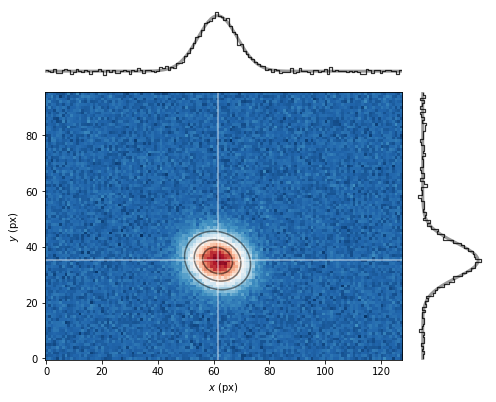

In [6]:
# fit
a = Gauss2DAngle(X, Y, Z)
popt = a.fit()
best_fit = a.func(X, Y, *popt)

# xy slice plots
fig, axes = subplots_xy(figsize=(7, 7), size=1)

# data
imshow_xy(axes, popt[0], popt[1], Z.T,
          cmap="RdBu_r",
          origin="lower",
          line_kw={"color":"white", "alpha":0.4, "linewidth":2},
          step_kw={"color":"black", "alpha":0.8, "linewidth":1.2})

# best fit
contour_xy(axes, popt[0], popt[1], X, Y, best_fit,
           autoscale=False, 
           levels=popt[2] * np.array([0.25, 0.5, 0.75]) + popt[-1],
           colors='k',
           alpha=0.5,
           plot_kw={"lw":3, "color":'k', "alpha":0.4})

# format
axes[0].set_xlabel("$x$ (px)")
axes[0].set_ylabel("$y$ (px)")
plt.tight_layout()
plt.show()

In [7]:
print(a.text())

xy = (61.42, 35.11) 
amplitude = 16.52 
FWHM = 15.65 
epsilon = 0.83 
angle = -0.42 
offset = 2.00
